In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 40)

# Use this to see how much memory the dataframes use
from sys import getsizeof

from vivarium_research_prl.noise import corruption, fake_names, noisify

!date
!whoami
!uname -a
!pwd

Wed 22 Feb 2023 04:30:26 PM PST
ndbs
Linux int-slurm-sarchive-p0001 5.4.0-135-generic #152-Ubuntu SMP Wed Nov 23 20:19:22 UTC 2022 x86_64 x86_64 x86_64 GNU/Linux
/mnt/share/code/ndbs/vivarium_research_prl/model_validation


# Find data

In [2]:
project_output_dir = \
    '/mnt/team/simulation_science/priv/engineering/vivarium_census_prl_synth_pop'
output_subdir = (
    'results/vv_age_perturbation/united_states_of_america/2023_02_16_16_28_30/'
    'final_results/2023_02_17_10_06_38'
)
output_dir = f'{project_output_dir}/{output_subdir}'

!ls -l $output_dir


total 6124364
-rw-r--r-- 1 albrja IHME-Simulationscience  902361273 Feb 17 11:31 decennial_census_observer.csv.bz2
-rw-r--r-- 1 albrja IHME-Simulationscience    9401209 Feb 17 11:31 household_survey_observer_acs.csv.bz2
-rw-r--r-- 1 albrja IHME-Simulationscience   48912276 Feb 17 11:32 household_survey_observer_cps.csv.bz2
-rw-r--r-- 1 albrja IHME-Simulationscience  196076329 Feb 17 11:35 social_security_observer.csv.bz2
-rw-r--r-- 1 albrja IHME-Simulationscience 5022817239 Feb 17 12:24 tax_w2_observer.csv.bz2
-rw-r--r-- 1 albrja IHME-Simulationscience   91687247 Feb 17 11:32 wic_observer.csv.bz2


# Load WIC data

In [4]:
%%time
df_wic = pd.read_csv(f'{output_dir}/wic_observer.csv.bz2')
df_wic

CPU times: user 18.8 s, sys: 820 ms, total: 19.6 s
Wall time: 19.6 s


,simulant_id,first_name_id,middle_name_id,last_name_id,age,sex,race_ethnicity,date_of_birth,address_id,state_id,...,year_of_birth,state,first_name,middle_initial,last_name,zipcode,street_number,street_name,unit_number,city
0,7359_37,7359_37,7359_37,7359_36,21.328291,Female,White,1999-08-12,7359_22,39,...,1999,OH,Emma,L,Sansom,45634,39323,los huecos dr,NaN,cleveland heights
1,7359_534,7359_534,7359_534,7359_534,28.912082,Female,Latino,1992-01-11,7359_222,48,...,1992,TX,Alexandria,B,Alonso,77979,512,106 street,NaN,georgetown
2,7359_580,7359_580,7359_580,7359_575,26.525698,Female,Black,1994-05-31,7359_235,37,...,1994,NC,Kayla,M,Bell,27613,282,bailey dr,NaN,statesville
3,7359_587,7359_587,7359_587,7359_587,39.129105,Female,White,1981-10-23,7359_238,6,...,1981,CA,Julie,K,Coe,91104,233,se 43rd ct,NaN,citrus hgths
4,7359_668,7359_668,7359_668,7359_668,28.240271,Female,Latino,1992-09-12,7359_266,6,...,1992,CA,Cassandra,W,Mendoza,93702,9120,colorado ave sw,NaN,alhambra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653706,5020_1173743,5020_1173743,5020_1173743,5020_874781,0.025101,Male,White,2030-01-14,5020_699335,15,...,2030,HI,Ismael,A,Cohen,96706,103,summer shade lane,NaN,waipahu
1653707,5020_1173744,5020_1173744,5020_1173744,5020_909404,0.036876,Male,Latino,2030-01-10,5020_717348,21,...,2030,KY,Abraham,C,Garcia,40906,2439,eagle l,NaN,richmond
1653708,5020_1173745,5020_1173745,5020_1173745,5020_939518,0.011262,Male,White,2030-01-19,5020_432454,8,...,2030,CO,Arturo,B,Bykerk,80439,298,sherbrooke rd,NaN,piney creek ranches
1653709,5020_1173747,5020_1173747,5020_1173747,5020_983853,0.009674,Female,White,2030-01-20,5020_504847,27,...,2030,MN,Myra,F,Miller,55125,2135,claremont av,NaN,burnsville


In [10]:
df_wic.dtypes

simulant_id               object
first_name_id             object
middle_name_id            object
last_name_id              object
age                      float64
sex                       object
race_ethnicity            object
date_of_birth             object
address_id                object
state_id                   int64
puma                       int64
guardian_1                 int64
guardian_2                 int64
guardian_1_address_id    float64
guardian_2_address_id    float64
wic_year                   int64
random_seed                int64
year_of_birth              int64
state                     object
first_name                object
middle_initial            object
last_name                 object
zipcode                    int64
street_number             object
street_name               object
unit_number               object
city                      object
dtype: object

In [87]:
getsizeof(df_wic)

1808414631

# Check age distribution in WIC

In [5]:
wic_ages = np.floor(df_wic.age)
wic_ages.describe()

count    1.653711e+06
mean     7.436797e+00
std      1.207987e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      9.400000e+01
Name: age, dtype: float64

In [6]:
wic_ages.value_counts()

0.0     470119
1.0     290892
2.0     220916
3.0     203247
4.0     116757
         ...  
76.0         1
73.0         1
85.0         1
79.0         1
81.0         1
Name: age, Length: 83, dtype: int64

<AxesSubplot: >

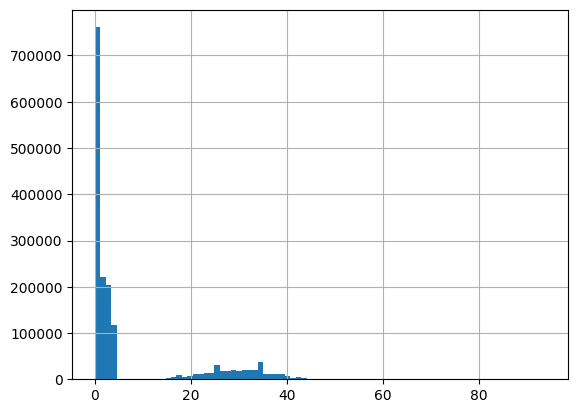

In [7]:
wic_ages.hist(bins=83)

<AxesSubplot: >

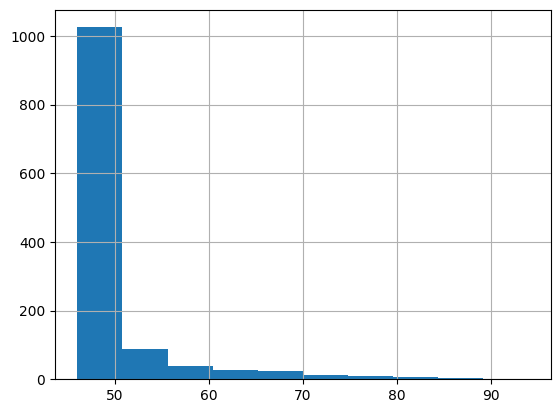

In [8]:
wic_ages.loc[wic_ages>45].hist()

In [9]:
wic_ages.loc[wic_ages>50].value_counts()

52.0    22
51.0    21
53.0    19
54.0    15
57.0    13
68.0    11
55.0    11
64.0     8
60.0     8
67.0     7
56.0     7
61.0     7
62.0     5
58.0     5
59.0     5
69.0     4
70.0     4
78.0     4
63.0     4
65.0     3
84.0     3
72.0     3
66.0     3
74.0     2
82.0     2
94.0     2
77.0     2
71.0     2
86.0     2
75.0     2
85.0     1
73.0     1
76.0     1
80.0     1
79.0     1
81.0     1
Name: age, dtype: int64

# Try to identify mothers in WIC

In [13]:
df_wic[['guardian_1', 'guardian_2']]

,guardian_1,guardian_2
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1
...,...,...
1653706,874782,874781
1653707,909408,-1
1653708,939518,-1
1653709,983853,-1


Text(0.5, 1.0, 'Age distribution of WIC participants with no guardian')

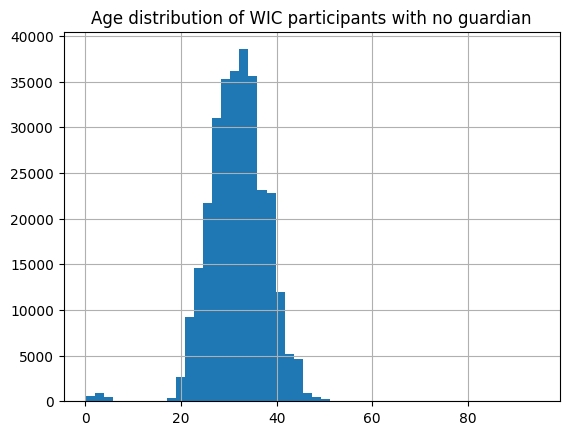

In [30]:
has_guardian = (df_wic.guardian_1 != -1) | (df_wic.guardian_2 != -1)
df_wic.loc[~has_guardian].age.hist(bins=50)
plt.title("Age distribution of WIC participants with no guardian")

Text(0.5, 1.0, 'Age distribution of WIC participants with a guardian')

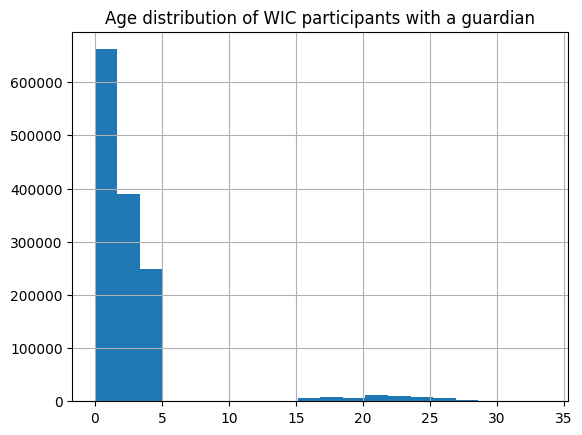

In [31]:
df_wic.loc[has_guardian].age.hist(bins=20)
plt.title("Age distribution of WIC participants with a guardian")

In [21]:
df_wic.loc[~has_guardian].query("age < 10").age.max()

4.999621782513243

In [48]:
df_wic.query("age >=5 ").age.min()

5.287375399786691

Text(0.5, 1.0, 'Age distribution of WIC participants under 11 with no guardian')

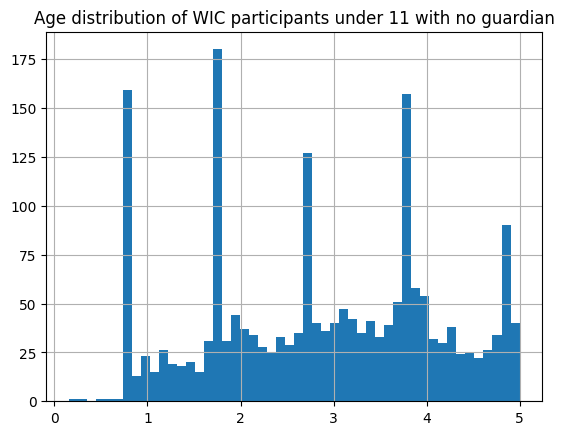

In [92]:
df_wic.loc[~has_guardian].query("age < 11").age.hist(bins=50)
plt.title("Age distribution of WIC participants under 11 with no guardian")

# Look into why we have spikes in the number of people of a certain age

### What if we stratify by year?

Yes, it looks like the spikes correspond to simulants born near the beginning of the sim. [Zeb thinks](https://ihme.slack.com/archives/C02KUQ9LX32/p1677201908178429?thread_ts=1676667487.118249&cid=C02KUQ9LX32) this is caused by clipping negative ages to zero during age perturbation.

In [96]:
df_wic.wic_year.unique()

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

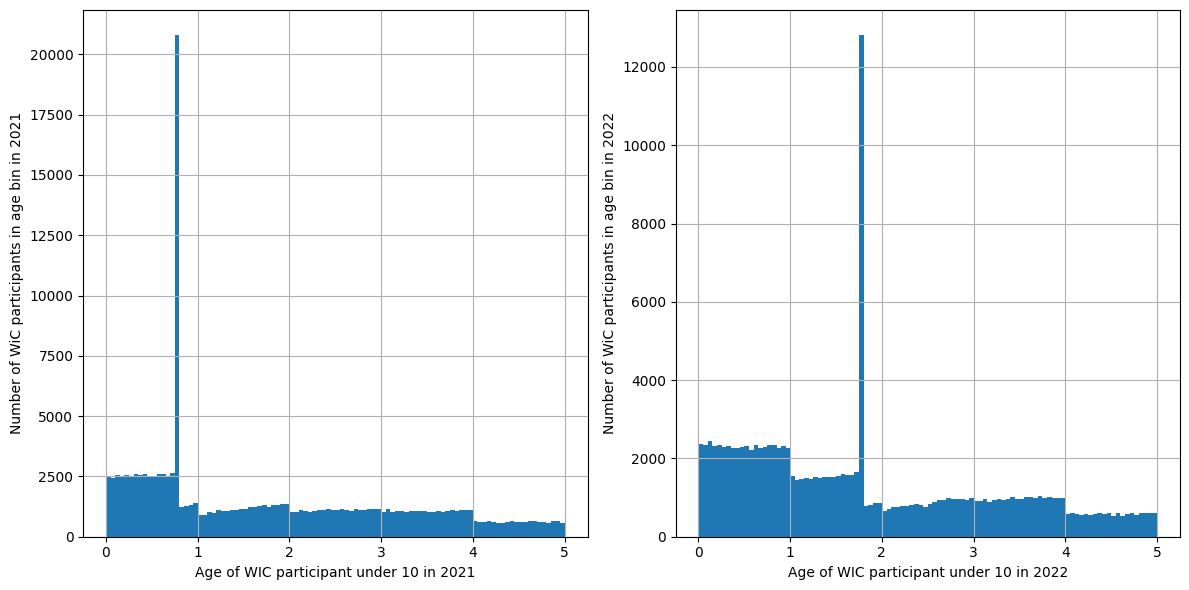

In [128]:
years = [2021, 2022]
fig, axs = plt.subplots(1,len(years), figsize=(12,6))
for i in range(len(years)):
    ax = axs[i]
    year = years[i]
    df_wic.query("wic_year == @year and age < 10").age.hist(bins=100, ax=ax)
    ax.set_xlabel(f"Age of WIC participant under 10 in {year}")
    ax.set_ylabel(f"Number of WiC participants in age bin in {year}")
    
fig.tight_layout()

Text(0, 0.5, 'Number of WIC participants in age bin in 2021')

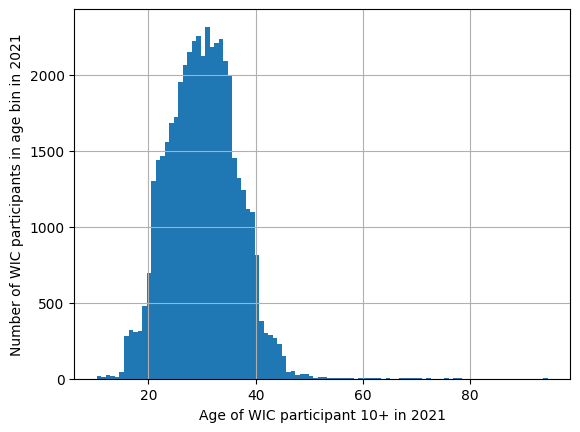

In [121]:
year = 2021
df_wic.query("wic_year == @year and age >=10").age.hist(bins=100)
plt.xlabel(f"Age of WIC participant 10+ in {year}")
plt.ylabel(f"Number of WIC participants in age bin in {year}")

# Plot age distribution of likely mothers with implausible ages

### Start with 60 and older, then age 5 to 9

In [38]:
wic_ages.max()

94.0

Total number of mothers: 351,780


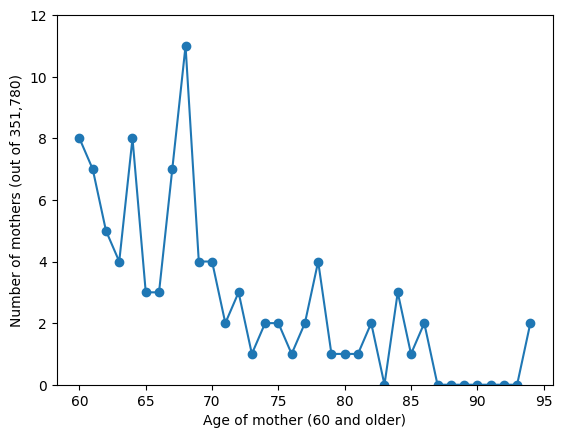

In [88]:
total_num_mothers = len(wic_ages.loc[wic_ages>=5])
older_mothers = wic_ages.loc[wic_ages>=60].value_counts().sort_index()
age_counts = pd.DataFrame(index=range(60,95)).join(older_mothers).fillna(0).squeeze()
plt.plot(age_counts.index, age_counts, marker='o')
plt.xlabel("Age of mother (60 and older)")
plt.ylabel(f"Number of mothers (out of {total_num_mothers:,})")
plt.ylim(0,12)
print(f"Total number of mothers: {total_num_mothers:,}")

Text(0, 0.5, 'Number of mothers (out of 351,780)')

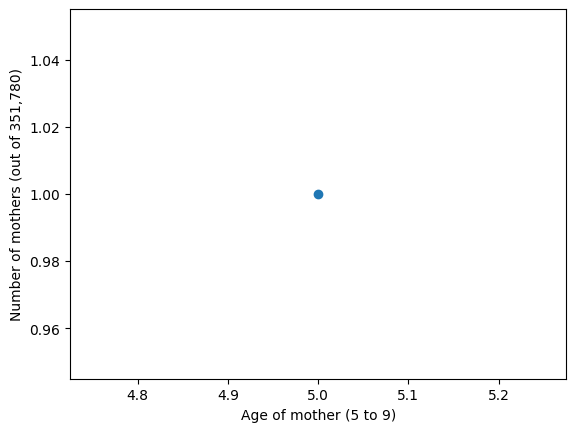

In [89]:
child_mothers = wic_ages.loc[(wic_ages>4) & (wic_ages<10)].value_counts().sort_index()
plt.plot(child_mothers.index, child_mothers, marker='o')
plt.xlabel("Age of mother (5 to 9)")
plt.ylabel(f"Number of mothers (out of {total_num_mothers:,})")
# plt.ylim(0,350)

In [50]:
child_mothers

5.0    1
Name: age, dtype: int64

In [53]:
df_wic.loc[wic_ages==5].T

,750525
simulant_id,2787_1010509
first_name_id,2787_1010509
middle_name_id,2787_1010509
last_name_id,2787_976156
age,5.287375
sex,Female
race_ethnicity,White
date_of_birth,2020-10-15
address_id,2787_418594
state_id,39


# Check address of the single potential 5-year-old mother to see if there's an infant there with her as a guardian

Yes, there is, simulant `2787_1100758` in 2026.

It looks like simulant `2787_1010509` shows up as a _child_ of ages 0 and 1 in years 2021 and 2022, then shows up as a _mother_ of age 5 in 2026, as guardian 1 of simulant `2787_1100758`.

In [167]:
'2787_1010509'
df_wic.loc[df_wic.address_id=='2787_418594'].T

,679938,687751,750525,762874,764919,776170,783382
simulant_id,2787_1010509,2787_1010509,2787_1010509,2787_1100758,2787_533137,2787_1108345,2787_1108345
first_name_id,2787_1010509,2787_1010509,2787_1010509,2787_1100758,2787_533137,2787_1108345,2787_1108345
middle_name_id,2787_1010509,2787_1010509,2787_1010509,2787_1100758,2787_533137,2787_1108345,2787_1108345
last_name_id,2787_976156,2787_976156,2787_976156,2787_976156,2787_533135,2787_533135,2787_533135
age,0.227827,1.224405,5.287375,0.499444,27.227592,0.665634,1.662212
sex,Female,Female,Female,Male,Female,Male,Male
race_ethnicity,White,White,White,Asian,White,White,White
date_of_birth,2020-10-15,2020-10-15,2020-10-15,2025-07-30,1999-10-08,2026-05-29,2026-05-29
address_id,2787_418594,2787_418594,2787_418594,2787_418594,2787_418594,2787_418594,2787_418594
state_id,39,39,39,39,39,39,39


In [169]:
df_wic.loc[df_wic.simulant_id == '2787_1100758'].T

,762874
simulant_id,2787_1100758
first_name_id,2787_1100758
middle_name_id,2787_1100758
last_name_id,2787_976156
age,0.499444
sex,Male
race_ethnicity,Asian
date_of_birth,2025-07-30
address_id,2787_418594
state_id,39


# Continue plotting age distribution of likely mothers with implausible ages

### Now do age 6 to 14

(0.0, 250.0)

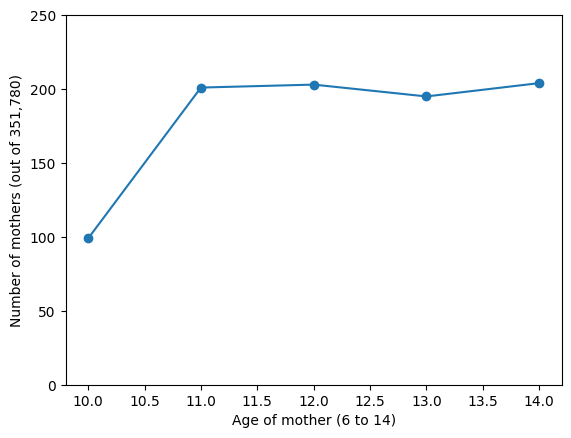

In [90]:
young_mothers = wic_ages.loc[(wic_ages>5) & (wic_ages<=14)].value_counts().sort_index()
plt.plot(young_mothers.index, young_mothers, marker='o')
plt.xlabel("Age of mother (6 to 14)")
plt.ylabel(f"Number of mothers (out of {total_num_mothers:,})")
plt.ylim(0,250)

# Look more closely into the mothers 60 and older

In [130]:
df_wic.loc[wic_ages==94].T

,2290,1489289
simulant_id,7359_467787,5020_318146
first_name_id,7359_467787,5020_318146
middle_name_id,7359_467787,5020_318146
last_name_id,7359_467787,5020_318146
age,94.14317,94.488838
sex,Female,Female
race_ethnicity,White,White
date_of_birth,1926-10-18,1926-06-14
address_id,7359_188244,5020_127730
state_id,51,25


In [138]:
df_wic.loc[df_wic.address_id=='7359_188244'].T

,2290,13714,23199
simulant_id,7359_467787,7359_467788,7359_467788
first_name_id,7359_467787,7359_467788,7359_467788
middle_name_id,7359_467787,7359_467788,7359_467788
last_name_id,7359_467787,7359_467787,7359_467787
age,94.14317,0.976321,1.972898
sex,Female,Male,Male
race_ethnicity,White,White,White
date_of_birth,1926-10-18,2019-12-18,2019-12-18
address_id,7359_188244,7359_188244,7359_188244
state_id,51,51,51


In [132]:
df_wic.query("age >= 60").wic_year.value_counts()

2021    60
2029     8
2023     6
2030     4
2025     3
2024     3
2026     3
2022     3
2027     2
2028     2
Name: wic_year, dtype: int64

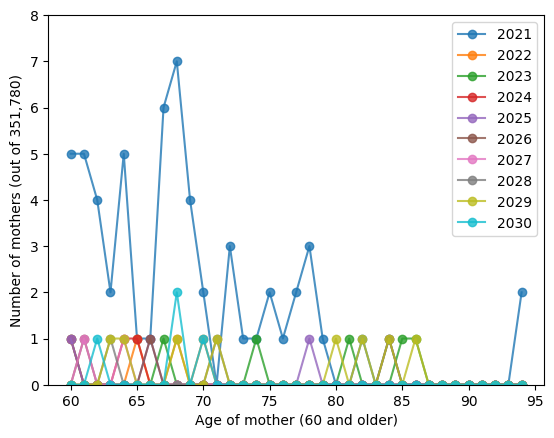

In [159]:
total_num_mothers = len(wic_ages.loc[wic_ages>=5])
years = range(2021, 2031)
for year in years:
    older_mother_index = (df_wic.wic_year == year) & (wic_ages>=60)
    older_mothers = wic_ages.loc[older_mother_index].value_counts().sort_index()
    age_counts = pd.DataFrame(index=range(60,95)).join(older_mothers).fillna(0).squeeze()
    plt.plot(age_counts.index, age_counts, marker='o', label=year, alpha=0.8)

    plt.xlabel("Age of mother (60 and older)")
plt.ylabel(f"Number of mothers (out of {total_num_mothers:,})")
plt.ylim(0,8)
plt.legend()

# See how many mothers of a given age there are year over year to see if there's a time trend

### First look at 10-year-olds, then look at 11-year-olds

There doesn't appear to be a time trend for these ages, but it might be worth drawing some more plots to double-check.

Text(0, 0.5, 'Number of 10-year-old mothers')

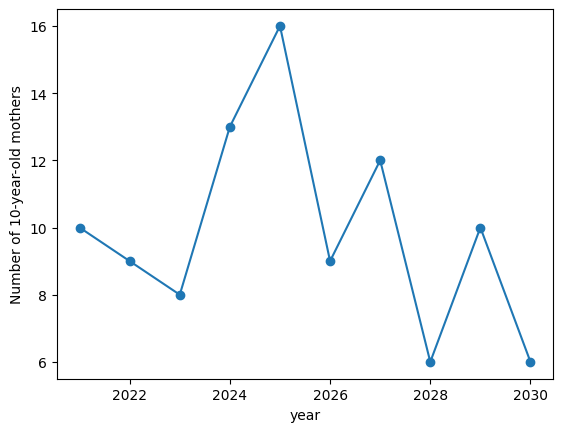

In [170]:
s = df_wic.query("10 <= age < 11").wic_year.value_counts().sort_index()
plt.plot(s.index, s, marker='o')
plt.xlabel('year')
plt.ylabel('Number of 10-year-old mothers')

In [162]:
s.sum()

99

Text(0, 0.5, 'Number of 11-year-old mothers')

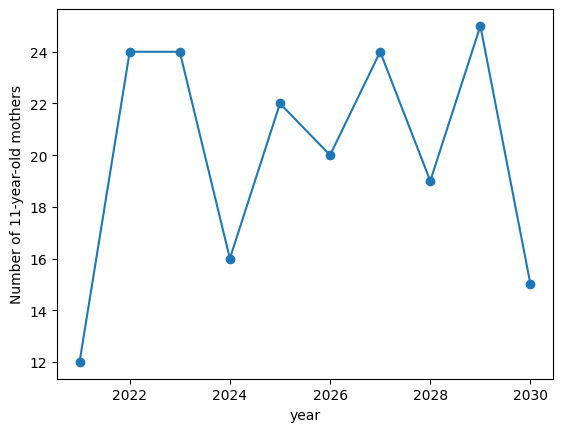

In [171]:
s = df_wic.query("11 <= age < 12").wic_year.value_counts().sort_index()
plt.plot(s.index,s,marker='o')
plt.xlabel('year')
plt.ylabel('Number of 11-year-old mothers')

In [164]:
s.sum()

201